In [14]:
import pandas
import numpy as np

In [15]:
#  Load the data from combined_df.csv
combined_df = pandas.read_csv('../datasets/combined_df.csv')

combined_df.drop(columns=['post'], inplace=True)

In [16]:
from sklearn.model_selection import train_test_split


X = combined_df.drop('subreddit', axis=1)  # Features
y = combined_df['subreddit']  # Target

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=70)
pca.fit(X)
X = pca.transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X  , y, test_size=0.2, random_state=42)

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Encode the categorical target variable (y_train) using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Step 2: Flatten the encoded labels
y_train_encoded = y_train_encoded.argmax(axis=1)
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).argmax(axis=1)

In [22]:
print(y_train_encoded.shape)
print(X_train.shape)

(299599,)
(299599, 70)


## Fitting the data and predicting with the model

In [23]:
from scratch_RFC import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier to the training data
rf_classifier.fit(X_train, y_train_encoded)

# Making predictions on the test data
predictions = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)

Fitting RFC:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting RFC: 100%|██████████| 100/100 [29:28<00:00, 17.68s/it]


Accuracy: 0.4968224299065421


In [24]:
# Generating a classification report
print("Classification Report:\n", classification_report(y_test_encoded, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.23      0.37      1577
           1       0.47      0.49      0.48      9182
           2       0.82      0.46      0.59      1254
           3       0.50      0.45      0.47     11419
           4       0.87      0.23      0.36      1754
           5       0.82      0.17      0.28      4899
           6       0.45      0.77      0.57     23472
           7       0.69      0.37      0.48      4724
           8       0.96      0.19      0.31      1766
           9       0.94      0.20      0.33      1788
          10       0.55      0.37      0.45     13065

    accuracy                           0.50     74900
   macro avg       0.73      0.36      0.43     74900
weighted avg       0.57      0.50      0.48     74900



In [32]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test_encoded, predictions)


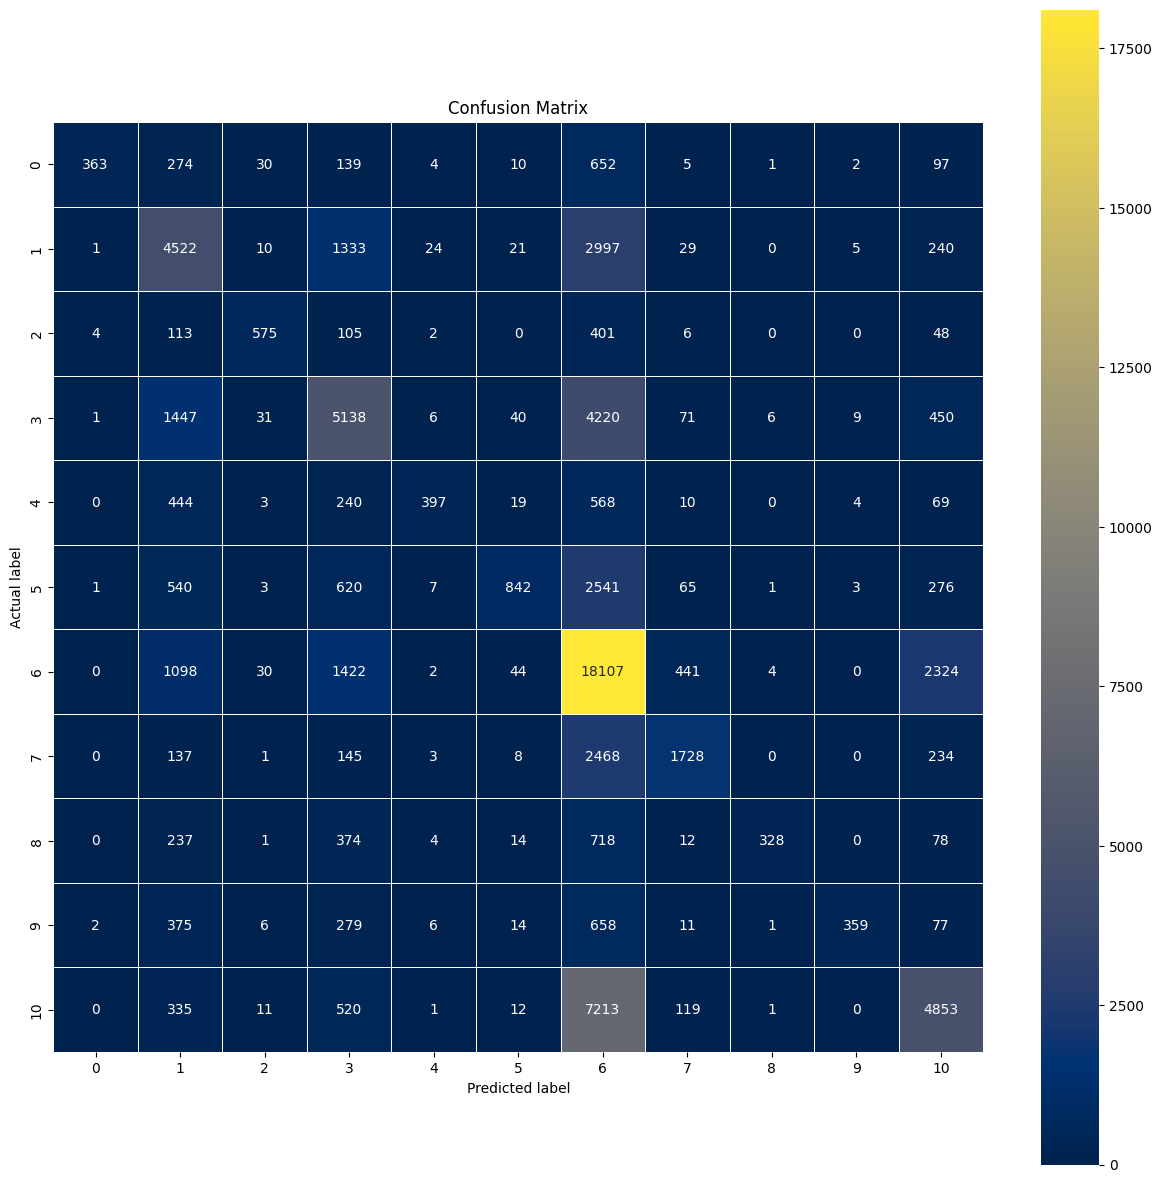

In [33]:

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square=True, cmap='cividis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [29]:
import pickle

# Saving the model to a file
with open('rfc_model_base.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

In [ ]:
del rf_classifier